            ## Практическое задание 3: Knn: классификация и регрессия

### Важно! О формате сдачи

* Все задания, кроме двух на реализацию кода, в этой части оцениваются по системе <font color='red'>кросс-рецензирования.</font>
* При решении ноутбука <font color='red'>используйте данный шаблон.</font> Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно
* Везде, где в формулировке задания есть <font color='red'>какой-либо вопрос (или просьба вывода)</font>, необходимо прописать ответ в ячейку (код или markdown).
* Наличие <font color='red'>кода решения обязательно.</font> Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.
* Если в ячейке написана фраза <font color='red'>"Вывод"/"Ответ на вопрос" итд</font>, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано <font color='red'>"Your code here" и пр. </font>, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст


### <font color=orange>*Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 10 минут </font>*

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

**Важно!**
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!**
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-23-24/blob/main/tutorials/Туториал%20по%20установке%20рабочего%20окружения%20в%20Python%20для%20решения%20задач.pdf)



In [1]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 1qa4VOOjn88tSEAXI_f-aKRzKldMdd5xS
! pip install -r requirements.txt

Downloading...
From: https://drive.google.com/uc?id=1qa4VOOjn88tSEAXI_f-aKRzKldMdd5xS
To: /root/mlcs/task3/requirements.txt
100%|██████████████████████████████████████████| 424/424 [00:00<00:00, 1.99MB/s]
  Using cached catboost-1.2.1-cp310-cp310-manylinux2014_x86_64.whl (98.7 MB)
  Using cached gdown-4.6.6-py3-none-any.whl (14 kB)
  Using cached h5py-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl (1.6 MB)
  Using cached ipympl-0.9.3-py2.py3-none-any.whl (511 kB)
  Using cached ipywidgets-7.7.1-py2.py3-none-any.whl (123 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached lightgbm-4.0.0-py3-none-manylinux_2_28_x86_64.whl (3.0 MB)
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.many

Проверим версию библиотеки:

In [7]:
! pip install scipy catboost

In [8]:
import catboost
assert(catboost.__version__ == '1.2.1')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

# Часть 0. Знакомство с библиотекой scikit-learn

`Scikit-learn` - это библиотека машинного обучения с открытым исходным кодом, которая предоставляет различные инструменты для предобработки данных и обучения моделей.

-----

Каждый **<font color=orange>модуль предобработки</font>** данных имеет два метода: `fit` и `transform`.

* Как правило, метод `fit` принимает на вход **обучающую** выборку $X$ и считает по ней необходимые для заданного типа преобразования статистики.
* Метод `transform` преобразует входные данные, используя статистики, посчитанные при вызове метода `fit` и возвращает преобразованные данные.

Выборка $X$ представляется в виде матрицы размера `(n_samples, n_features)`, то есть каждому *объекту* соответствует отдельная строка, а каждому* признаку* - отдельный столбец.

------

Каждая **<font color=orange>модель машинного обучения</font>** имеет два метода: `fit` - метод ответственный за обучения модели и `predict` - метод ответственный за предсказание целевой переменной.
* Как правило, метод `fit` принимает на вход два аргумента: $X$ - **обучающая** выборка, $y$ - значения целевых переменных на объектах обучающей выборки.
* Метод `predict` принимает на вход набор данных и выдает предсказанные значения целевых переменных на этом наборе данных.
* В моделях классификации бывает метод `predict_proba`, который принимает на вход набор данных и выдает вероятности принадлежности классам.

Если нами решается задача *классификации*, то вектор целевых переменных $y$ содержит целые числа (или другое множество дискретных величин). При решении задачи *регрессии* вектор $y$ содержит вещественные числа.

----
Более подробно про библиотеку можно прочитать в документации по [ссылке](https://scikit-learn.org/stable/index.html)

Приведем пример стандартной работы с библиотекой scikit-learn

In [9]:
#Создаем обучающую выборку
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

#Делаем импорт класса K-NN классификатора
from sklearn.neighbors import KNeighborsClassifier

#Создаем объект класса 3-NN классификатора
neigh = KNeighborsClassifier(n_neighbors=3)

#Обучаем классифкатора на созданной ранее выборке
neigh.fit(X, y)

#Предсказываем метку класса нового объекта с помощью метода predict
print(neigh.predict([[1.1]]))

[0]


# Часть 1. Нормализация признакового пространства

В задачах машинного обучения важную роль играет нормализация данных. Для числовых признаков, как правило, используют два типа нормализации:

* **Нормализация к распределению с нулевым матожиданием** и единичной дисперсией $x := \frac{x - E(x)}{\sigma (x)}$, где матожидание $E(x)$ и стандартное отклонение $\sigma (x)$ считаются по каждому признаку (столбцу) отдельно
* Нормализация в отрезок [0, 1] $x := \frac{x - \min(x)}{\max(x) - \min(x)}$, где минимум и максимум берется по каждому признаку (столбцу) отдельно

Рассмотрим пример. Ниже приведены: таблца до нормализации признаков, таблица после нормализации к нулевому матожиданию и единичной дисперсии, таблица после нормализации в отрезок [0, 1]

До нормализации

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 1           | 2           |
| 2           | -1          |
| 3           | 0           |

Нормализация к нулевому матожиданию и единичной дисперсии

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| -1.225      | 1.336       |
| 0           | -1.069      |
| 1.225       | -0.267      |

Нормализация в отрезок [0, 1]

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 0           | 1           |
| 0.5         | 0           |
| 1           | 0.333       |

---

    **Задание 1.1** (юнит-тесты, 5 баллов) В модуле `scalers.py` реализуйте два вида нормализации признакового пространства. `StandardScaler` - нормализация к распределению с нулевым матожиданием и единичной дисперсией, `MinMaxScaler` - нормализация в отрезок [0, 1].

Нормализаторы имеют два метода - метод `fit` и метод `transform`. Метод `fit `получает на вход **обучающую** выборку и считает по ней все необходимые для заданного преобразования статистики. Метод `transform` преобразует данные, используя статистистики, посчитанные при вызове метода `fit`.

Примеры запусков функций можно увидеть в открытых тестах.

**<font color=red>После того, как вы локально реализовали и протестировали модуль scalers.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки. Будьте внимательны, по окончании сессии хранилище очистится -- вам нужно будет заново загрузить соответствующие модули</font>**

In [10]:
from scalers import StandardScaler, MinMaxScaler

In [11]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [12]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Downloading...
From: https://drive.google.com/uc?id=1acbP4PNmu11rkBzozvIc3bowWaQL7iFe
To: /root/mlcs/task3/data.pkl
100%|██████████████████████████████████████| 5.03k/5.03k [00:00<00:00, 17.9MB/s]


Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [13]:
with open('data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [14]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.grid()

Визуализируем наши данные

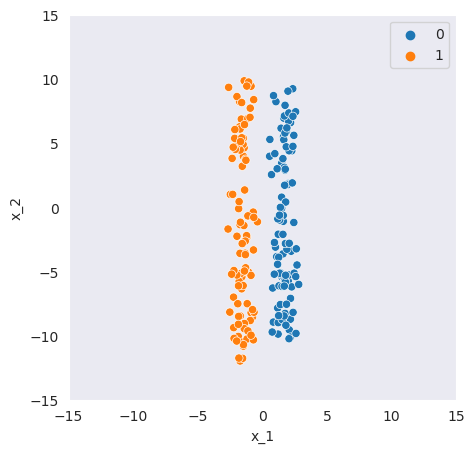

In [15]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [16]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]

    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

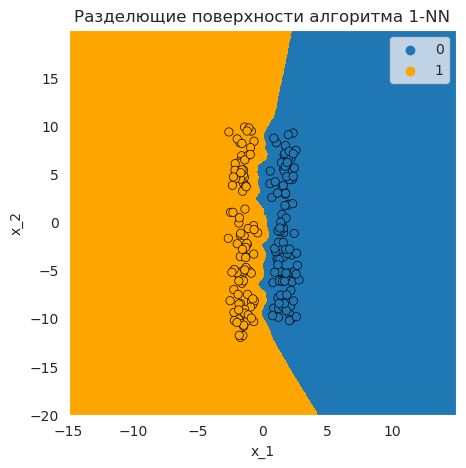

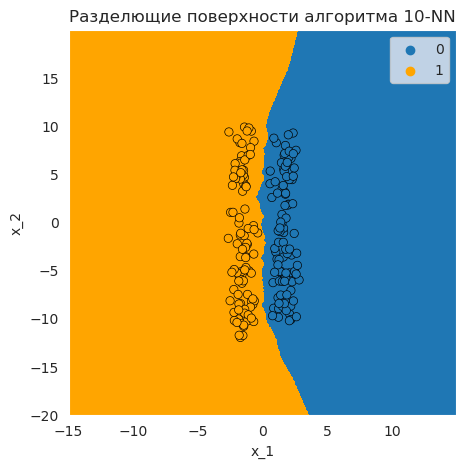

In [17]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

**Задание 1.2** (кросс, 2 балла) Чем отличаются поверхности, полученные при числе соседей 1 и 10? Объясните, чем вызваны данные отличия

Поверхность полученная при числе соседей 10 является более точная и более гладкая, чем при числе соседей 1. Это связано с тем, что при числе соседей 10, алгоритм учитывает больше точек, чем при числе соседей 1, и поэтому поверхность получается более гладкой.

**Задание 1.3** (кросс, 3 балла) Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x_1=0$ при значениях $x_2 < -10$ и $x_2 > 10$. Дайте строгое математическое обоснование наблюдаемого явления, показывающее, что в Евклидовом пространстве данная проблема решается нормализацией признаков.

Из-за того, что признаки имеют разный масштаб.
Доказательство:
Пусть имеется два признака $x_1$ и $x_2$ 
Пусть $x_1$ изменяется в диапазоне [0, 1], $x_2$ изменяется в диапазоне [0, 100]. Рассмотрим две точки:

$ A(0.5, 50) $ и $\( B(0.5, 51) \)$

Евклидово расстояние между этими точками:
$\[ d(A, B) = \sqrt{(0.5-0.5)^2 + (50-51)^2} = 1 \]$

Теперь рассмотрим другую пару точек:
$\( C(0.4, 50) \) и \( D(0.6, 50) \)$

Евклидово расстояние между \( C \) и \( D \):
$\[ d(C, D) = \sqrt{(0.4-0.6)^2 + (50-50)^2} = 0.2 \]$

Даже небольшое изменение в $\( x_2 \) $приводит к большому изменению в расстоянии по сравнению с изменением в $\( x_1 \)$
Пусть масштаб одного признака в k раз больше другого. Пусть $\Delta_x_2 = k\Delta_x_1$.
Тогда $\[ d(A, B) = \sqrt{1 + k^2{\Delta_x_1}} \]$ То есть если масштаб одного признака в $k$ раз больше другого, то вес будет в $k^2$ раз больше.



---

Данную проблему может решить нормализация признакового пространства.

**Задание 1.4** (кросс, 1 балл) Начертите разделяющие поверхности для $KNN$, обученного на нормализованных признаках с помощью реализованных вами нормализаторов. Используйте функцию $plot\_knn\_bound$. Менять функцию $plot\_knn\_bound$ нельзя.

In [ ]:
from scalers import (StandardScaler, MinMaxScaler)
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
standard_scaler.fit(X)
minmax_scaler.fit(X)
plot_knn_bound(X, y, scaler=standard_scaler, n_neighbors=1)
plot_knn_bound(X, y, scaler=standard_scaler, n_neighbors=10)

plot_knn_bound(X, y, scaler=minmax_scaler, n_neighbors=1)
plot_knn_bound(X, y, scaler=minmax_scaler, n_neighbors=10)


**Задание 1.5** (кросс, 4 балла) Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются разделяющие поверхности этого классификатора? Требуется математически строго, однозначно и с полным обоснованием определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

In [ ]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

Представим каждую точку как отдельный класс. Разделяющая поверхность для двух точек будет линией, которая равноудалена от обеих точек. Это линия, которая образует серединный перпендикуляр к отрезку, соединяющему эти две точки.

Когда имеется три точки, разделяющая поверхность будет сферой или окружностью, центр которой находится в точке пересечения серединных перпендикуляров, проведенных через каждую пару точек. Таким образом, эти три точки лежат на окружности, и разделяющей поверхностью будет сфера, которая охватывает их.

В случае четырех точек, мы выбираем три из них, чтобы построить первую сферу минимального радиуса, проходящую через них. Затем мы строим вторую сферу, также минимального радиуса, но уже включающую четвертую точку. Первая сфера пересекается с второй сферой в двух точках. Мы строим перпендикуляры к отрезкам, соединяющим эти две точки пересечения (первые перпендикуляры). Таким образом, у нас есть два первых перпендикуляра и два последних перпендикуляра.

Разделяющей поверхностью будут сегменты первых перпендикуляров, которые не пересекаются с последними перпендикулярами, а также отрезки, образованные пересечениями первых перпендикуляров с последними. Эти сегменты и отрезки образуют разделяющую границу классификатора 1-NN для четырех точек.

Аналогичные действия могут быть выполнены для большего числа точек, сохраняя тот же принцип построения разделяющей поверхности.

# Часть 2. Кросс-валидация на задаче регрессии

При решении прикладных задач, как правило, доступна лишь обучающая выборка. Для того чтобы иметь возможность оценить качество модели на тестовой выборке, прибегают к методу, называемому `кросс-валидация`.  

Пусть зафиксирован некоторый набор гиперпараметров модели. В $KNN$ под гиперпараметрами могут пониматься число соседей, метрика близости $\rho$, стратегия выбора весов $w_i$.

* При кросс-валидации **обучающая** выборка делится на $n$ равных частей (folds).
* Затем обучаются $n$ моделей с заданными параметрами (у всех моделей параметры одинаковые и фиксированы) - $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold).
* Затем измеряется качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, то полученная оценка качества модели будет являться корректной.
* Финальным значением метрики качества для модели с заданными параметрами является *среднее полученных нами значений* на $n$ фолдах.



*Подумайте, как в описанную выше схему корректно добавить обучение нормализаторов*



Принцип работы кросс-валидации схематично изображен на рисунке.

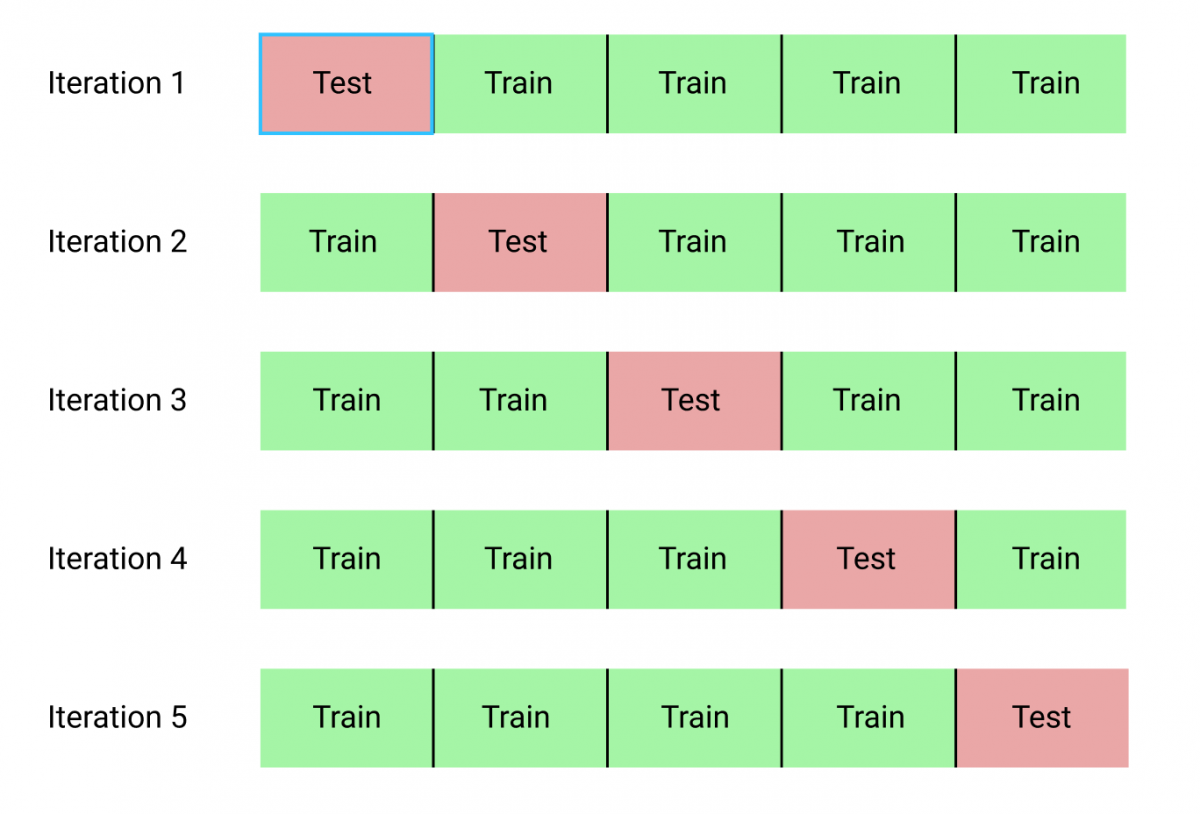

Небольшое видео объяснение о том, как работает кросс-валидация, можно посмотреть по [ссылке](https://www.youtube.com/watch?v=fSytzGwwBVw)

-----------
<font color="white" style="opacity:0.2023"></font>

**Задание 2.1** (юнит-тесты, 12 баллов) В модуле cross\_val.py реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели
   
Примеры запусков функций можно увидеть в открытых тестах.

----

Далее будем решать задачу предсказания цены дома в Калифорнии с помощью $KNN$-регрессии. В качестве метрики качества будем использовать $R^2-$score.

$R^2(y\_true, y\_predict) = 1 - \frac{\sum_{i=1}^{n} (y\_true_i - y\_predict_i)^2}{\sum_{i=1}^{n} (y\_true_i - E(y\_true_i))^2}$

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
X, y = fetch_california_housing(return_X_y=True)

**Задание 2.2** (кросс, 2 балла) Разбейте выборку на обучающую (75%) и тестовую (25%) с помощью функции $train\_test\_split$. Используйте параметр **random_state=42!** Не забудьте перемешать данные перед разбиением (см. параметры функции). Запустите кросс-валидацию на 3 фолдах с помощью реализованных вами функций $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $r2\_score$. Модуль $KNN$-регрессии следует импортировать из sklearn.neighbors. Параметры для перебора описаны ниже

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.metrics import r2_score

parameters = {
    'n_neighbors': [1, 5, 10],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(None, 'None'), (MinMaxScaler(), 'MinMax'), (StandardScaler(), 'Standard')]
}
score_function = r2_score


**<font color=red>После того, как вы локально реализовали и протестировали модуль cross_val.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки</font>**

In [ ]:
from cross_val import kfold_split, knn_cv_score
folds = kfold_split(len(X_train), 3)
score = knn_cv_score(X_train, y_train, parameters, score_function, folds, KNeighborsRegressor)



**Задание 2.3** (кросс, 2 балла) Какой наибольший $r2\_score$ удалось достичь на валидации? Какие закономерности вы видите? Обучите модель с наилучшими параметрами на всей обучающей выборке, измерьте $r2\_score$ на тестовой выборке.


Выведите результаты кросс-валидации

In [ ]:
#ваш код
# score
#find best key value 
best_key = max(score, key=score.get)
best_score = score[best_key]
print(f'Best score: {best_score} with params: {best_key}')
score

Best score: 0.7035316821435433 with params: ('MinMax', 10, 'euclidean', 'distance'). 
Наибольший: 0.7035316821435433. Видно, что без нормализации результаты хуже, чем с нормализацией. То есть нормализация улучшает результаты.



Обучите модель с лучшими по валидации параметрами на обучающей выборке

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train = minmax_scaler.transform(X_train)
x_test = minmax_scaler.transform(x_test)
neighbors_model = KNeighborsRegressor(n_neighbors=10, metric='euclidean', weights='distance')
neighbors_model.fit(X_train, y_train)

# find r2score on test data
y_pred = neighbors_model.predict(x_test)
r2_score(y_test, y_pred)


----------------
<font color="white" style="opacity:0.2023"></font>

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике. В качестве метрики качества будем использовать $accuracy\_score$. Accuracy - это доля верно классифицированных объектов, среди всех объектов выборки.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [ ]:
print(X_train[0])

In [ ]:
X_train = np.array(X_train, dtype=object)

In [ ]:
X_test = np.array(X_test, dtype=object)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в числовой вектор фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* **Токенизация.** Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* **Нормализация.** Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* **Векторизация.** Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации. Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа. Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ можно прочитать [здесь](https://ru.wikipedia.org/wiki/TF-IDF). Более подробно про работу с текстами можно прочитать в [статье](https://habr.com/ru/companies/otus/articles/687796/) на Хабре и в [NLTK Book](https://www.nltk.org/book/).

В sklearn все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [ ]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, max_features=1000, stop_words='english')

**Задание 3.1** (кросс, 2 балла) Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке. Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$. 3х фолдов для кросс-валидации будет достаточно.

In [ ]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
} 

Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [ ]:
#ваш код
folds = kfold_split(len(X_train), 3)
score = knn_cv_score(X_train, y_train, parameters, accuracy_score, folds, KNeighborsClassifier)
score

**Задание 3.2** (кросс, 2 балла) Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [ ]:
#ваш код
best_key = max(score, key=score.get)
best_score = score[best_key]
print(f'Best score: {best_score} with params: {best_key}')

Best score: 0.6936529067480152 with params: ('TfidfVectorizer', 1, 'cosine', 'uniform')
Наилучший результат дает TfidfVectorizer. Это связано с тем, что он учитывает частоту встречаемости токена во всех документах обучающей выборки, а не только в данном документе, как CountVectorizer.

**Задание 3.3** (кросс, 2 балла) Начертите график зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параматрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

In [ ]:
#ваш код
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
average_scores = {}
for key, value in score.items():
    neighbors = key[1]
    if neighbors in average_scores:
        average_scores[neighbors].append(value)
    else:
        average_scores[neighbors] = [value]

for neighbors, scores in average_scores.items():
    average_scores[neighbors] = sum(scores) / len(scores)

neighbors = list(average_scores.keys())
scores = list(average_scores.values())

plt.plot(neighbors, scores, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Average Quality Metric')
plt.title('Dependency of Quality Metric on Number of Neighbors')
plt.grid(True)  
plt.show()


In [ ]:
# get target names
target_names = fetch_20newsgroups(subset='train').target_names
target_names

Чем меньше соседей, тем лучше качество. Это связано с тем, что в нашей выборке много классов, и чем меньше соседей, тем меньше шансов, что соседи будут из другого класса. Есть близкие по смыслу тему, из-за этого качество может падать при большом количестве соседей.

**Задание 3.4** (кросс, 3 балла) Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему? При ответе на поставленные вопросы вам поможет анализ распределений обучающей и тестовой выборок

In [ ]:
tf_idf.fit(X_train)
X_train = tf_idf.transform(X_train)
X_test = tf_idf.transform(X_test)
neighbors_model = KNeighborsClassifier(n_neighbors=1, metric='cosine', weights='uniform')
neighbors_model.fit(X_train, y_train)

y_pred = neighbors_model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=np.arange(21)-0.5, edgecolor='k')
plt.title("Training Data")
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=np.arange(21)-0.5, edgecolor='k')
plt.title("Test Data")
plt.show()


* Качество на тестовой выборке значительно меньше, чем на обучающей.
* Видно, что распределение классов в обучающей и тестовой выборках примерно совпадают.
* Скорее всего это связано с тем, что в тестовой выборке есть классы, которых нет в обучающей выборке. Из-за этого качество на тестовой выборке ниже.